# Projeto 3 - Extração de características e classificação de folhas de uva - Grapevine Leaves Image Dataset

## Entrega
O projeto deve ser entregue até o domingo da 4ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.
O prazo máximo é segunda-feira da 4ª semana de aula, valendo 20% a menos da nota.
## Dados do Certificado
 - Linguagem: Python
 - Tecnologias: Pandas, Numpy, Tensorflow, Keras, PIL, Matplotlib e Sklearn
 - Carga horária: 12 horas

## Grapevine Leaves Image Dataset - Kaggle
Este é um conjunto de dados de imagens de folhas de uva. A análise das espécies de folhas de uva são importantes para determinar o preço e o sabor. Encontrar as características a partir de uma folha pode auxiliar a saber o valor e a qualidade de uma safra.


## Preparação do ambiente
Faça o download e carregue o dataset Grapevine Leaves Image Dataset.

In [ ]:
import os
import numpy as np 
import pandas as pd 
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential, Model, load_model
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import drive



In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
labels = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
base_dir = '/content/drive/MyDrive/Colab Notebooks/Grapevine_Leaves_Image_Dataset'

print(os.listdir(base_dir))

['Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Dimnit', 'Nazli', 'Ala_Idris', 'Ak', 'Buzgulu']


## Exercícios


### Questão 1) Escolha uma rede pré-treinada em imagens para fazer transferência de aprendizado por meio de fine-tuning (2,5 pontos):

In [ ]:
path = []
label = []

for grape_class in os.listdir(base_dir):
    label_path = os.path.join(base_dir,grape_class)
    if grape_class in labels:
        for img in os.listdir(label_path):
            path.append(os.path.join(label_path, img))
            label.append(grape_class)

In [ ]:
path = pd.Series(path)
labels = pd.Series(label)
img_data = pd.DataFrame({'Path':path.values, 'Label':labels.values})

In [ ]:
img_data.head()

,Path,Label
0,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
1,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
2,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
3,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
4,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit


In [ ]:
from keras_preprocessing.image.utils import load_img
imagem = []
for chave,elemento in enumerate(path) :
  imagem.append(load_img(elemento))


In [ ]:
imagem = np.array(imagem)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


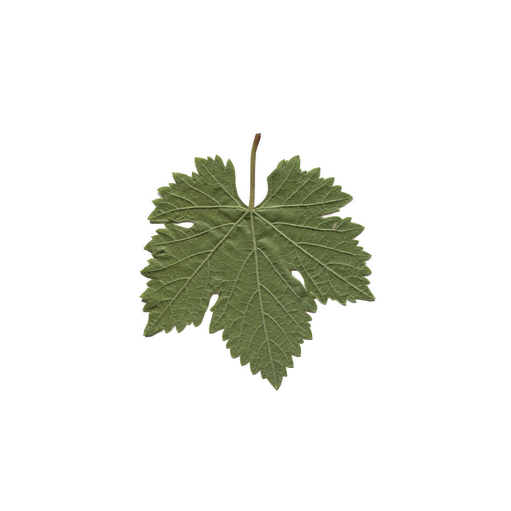

In [ ]:
imagem[1]

In [ ]:
img_data.Label.value_counts()

Dimnit       100
Nazli        100
Ala_Idris    100
Ak           100
Buzgulu      100
Name: Label, dtype: int64

In [ ]:
import cv2
aux = []
for i in img_data.Path.keys():
  teste = cv2.imread(img_data.Path[i])
  teste = cv2.resize(teste,(224,224))
  aux.append(teste)
 

In [ ]:
aux = np.array(aux)

In [ ]:
aux.shape

(500, 224, 224, 3)

In [ ]:
aux = aux.astype('float32')
aux /= 255

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_label = lb.fit_transform(img_data.Label)


In [ ]:
new_label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
img_data['new_label'] = new_label
img_data.head()

,Path,Label,new_label
0,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit,3
1,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit,3
2,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit,3
3,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit,3
4,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit,3


In [ ]:
X = aux.copy()
y = img_data.new_label


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)

In [ ]:
y_train = to_categorical(y_train,5)
y_val = to_categorical(y_val,5)

### a) Determine quais camadas serão acrescentadas, o tamanho do batch, a quantidade de épocas e a forma de treinamento (fit ou train_on_batch) (2 pontos).

In [ ]:
modelo = ResNet50(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
modelo = Model(inputs=modelo.input, outputs=modelo.get_layer(index=-1).output)


newTop = Sequential()
newTop.add(Flatten(input_shape=modelo.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

modelo = Model(inputs = modelo.input, outputs = newTop(modelo.output))
modelo.summary()

optimizer = 'adam'
modelo.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

94781440/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
history1 = modelo.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
13/13 [==============================] - 23s 393ms/step - loss: 14.0233 - accuracy: 0.2975
Epoch 2/30
13/13 [==============================] - 4s 290ms/step - loss: 2.8880 - accuracy: 0.5800
Epoch 3/30
13/13 [==============================] - 4s 288ms/step - loss: 2.4140 - accuracy: 0.7600
Epoch 4/30
13/13 [==============================] - 4s 289ms/step - loss: 1.5080 - accuracy: 0.7675
Epoch 5/30
13/13 [==============================] - 4s 289ms/step - loss: 1.5943 - accuracy: 0.7950
Epoch 6/30
13/13 [==============================] - 4s 291ms/step - loss: 1.2922 - accuracy: 0.8325
Epoch 7/30
13/13 [==============================] - 4s 291ms/step - loss: 1.3634 - accuracy: 0.8575
Epoch 8/30
13/13 [==============================] - 4s 291ms/step - loss: 1.2209 - accuracy: 0.8600
Epoch 9/30
13/13 [==============================] - 4s 292ms/step - loss: 1.7753 - accuracy: 0.7975
Epoch 10/30
13/13 [==============================] - 4s 292ms/step - loss: 1.7430 - accuracy: 0.80

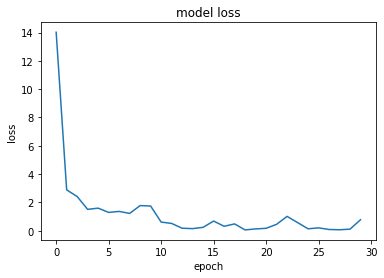

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### b) Compare a predição diretamente pela rede com a extração de características (0,5 ponto).

In [ ]:
score = modelo.evaluate(X_val, y_val)
print(modelo.metrics_names)

4/4 [==============================] - 0s 79ms/step - loss: 1.6106 - accuracy: 0.2000
['loss', 'accuracy']


In [ ]:
print(f"Acurácia: {score[1]:.2f}")

Acurácia: 0.20


## Questão 2) Considerando a mesma rede pré-treinada do exercício anterior, faça fine-tuning congelando algumas camadas. Determine a quantidade de camadas a serem congeladas, indique o setup escolhido e compare o resultado obtido em relação ao fine-tuning convencional. (2,5 pontos)

In [ ]:
modelo2 = ResNet50(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
modelo2 = Model(inputs=modelo2.input, outputs=modelo2.get_layer(index=-1).output)


newTop = Sequential()
newTop.add(Flatten(input_shape=modelo2.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

modelo2 = Model(inputs = modelo2.input, outputs = newTop(modelo2.output))


for layer in modelo2.layers[:-int(10)]:
    layer.trainable = False

modelo2.summary()

optimizer = 'adam'
modelo2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history2 = modelo2.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 100ms/step - loss: 0.3894 - accuracy: 0.8575
Epoch 2/30
13/13 [==============================] - 1s 97ms/step - loss: 0.4461 - accuracy: 0.8400
Epoch 3/30
13/13 [==============================] - 1s 97ms/step - loss: 0.3914 - accuracy: 0.8575
Epoch 4/30
13/13 [==============================] - 1s 98ms/step - loss: 0.5331 - accuracy: 0.7950
Epoch 5/30
13/13 [==============================] - 1s 98ms/step - loss: 0.4484 - accuracy: 0.8200
Epoch 6/30
13/13 [==============================] - 1s 97ms/step - loss: 0.2900 - accuracy: 0.9100
Epoch 7/30
13/13 [==============================] - 1s 97ms/step - loss: 0.3060 - accuracy: 0.8775
Epoch 8/30
13/13 [==============================] - 1s 99ms/step - loss: 0.1650 - accuracy: 0.9500
Epoch 9/30
13/13 [==============================] - 1s 98ms/step - loss: 0.1704 - accuracy: 0.9575
Epoch 10/30
13/13 [==============================] - 1s 98ms/step - loss: 0.1963 - accuracy: 0.9425
Epoch 11

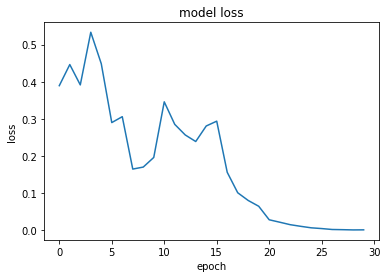

In [ ]:
plt.plot(history2.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
score2 = modelo2.evaluate(X_val, y_val)
print(modelo2.metrics_names)

4/4 [==============================] - 1s 82ms/step - loss: 0.9252 - accuracy: 0.7000
['loss', 'accuracy']


In [ ]:
print(f"Acurácia: {score2[1]:.2f}")

Acurácia: 0.70


## Questão 3) Considerando a mesma rede pré-treinada do primeiro exercício, faça fine-tuning com Data Augmentation. Explore essas técnicas e verifique se sua utilização melhora a performance do modelo. Não fique restrito às técnicas de exemplo. Estude as demais funções existentes no pacote ImageGenerator. (2,5 pontos)

In [ ]:
def kerasAugmentation(X, Y, augmentation, qtdade):
  print("\tCreating data augmentation usign Keras ...")
  
  # determinando o gerador das imagens a ser utilizado e sua configuração
  if (augmentation == "Rotation"):
    datagen = ImageDataGenerator(rotation_range=90)
  elif (augmentation == "Shift"):
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
  elif (augmentation == "Flip"):
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    
  images = []
  labels = []

  for i in range(0, X.shape[0]):
    it = datagen.flow(np.expand_dims(X[i], 0), batch_size=1) # passamos 1 imagem por vez
    for j in range(0, qtdade):
      batch = it.next() # selecionamos a próxima imagem gerada
      images.append(batch[0].astype(np.uint8)) # convertemos esta imagem na codificação adequada para o nosso conjunto de dados
      labels.append(Y[i])
      
  images = np.array(images)
  labels = np.array(labels)
  return images, labels


In [ ]:
images, labels = kerasAugmentation(X_train, y_train, "Shift", 1)
X_train = np.concatenate((X_train, images), axis=0)
y_train = np.concatenate((y_train, labels), axis=0)

	Creating data augmentation usign Keras ...


In [ ]:
modelo3 = ResNet50(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
modelo3 = Model(inputs=modelo3.input, outputs=modelo3.get_layer(index=-1).output)


newTop = Sequential()
newTop.add(Flatten(input_shape=modelo3.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

modelo3 = Model(inputs = modelo3.input, outputs = newTop(modelo3.output))
modelo3.summary()

optimizer = 'adam'
modelo3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history3 = modelo3.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
25/25 [==============================] - 13s 303ms/step - loss: 6.1787 - accuracy: 0.2825
Epoch 2/30
25/25 [==============================] - 8s 304ms/step - loss: 2.4684 - accuracy: 0.4013
Epoch 3/30
25/25 [==============================] - 8s 305ms/step - loss: 1.8325 - accuracy: 0.4512
Epoch 4/30
25/25 [==============================] - 8s 305ms/step - loss: 1.2139 - accuracy: 0.6438
Epoch 5/30
25/25 [==============================] - 8s 308ms/step - loss: 0.7190 - accuracy: 0.8238
Epoch 6/30
25/25 [==============================] - 8s 310ms/step - loss: 0.4912 - accuracy: 0.9025
Epoch 7/30
25/25 [==============================] - 8s 315ms/step - loss: 0.6678 - accuracy: 0.8300
Epoch 8/30
25/25 [==============================] - 8s 312ms/step - loss: 0.7421 - accuracy: 0.8363
Epoch 9/30
25/25 [==============================] - 8s 313ms/step - loss: 0.5692 - accuracy: 0.8475
Epoch 10/30
25/25 [==============================] - 8s 314ms/step - loss: 0.4021 - accuracy: 0.896

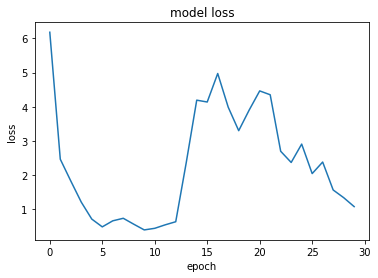

In [ ]:
plt.plot(history3.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

In [ ]:
score3 = modelo3.evaluate(X_val, y_val)
print(modelo3.metrics_names)

4/4 [==============================] - 1s 75ms/step - loss: 1.8213 - accuracy: 0.2400
['loss', 'accuracy']


In [ ]:
print(f"Acurácia: {score3[1]:.2f}")

Acurácia: 0.24


## Questão 4) Interpretação dos resultados (2,5 pontos):

### a) Baseando-se nos experimetnos anteriores, indique a melhor solução para este conjunto de dados.


Foram realizados 3 experimentos, conforme segue:
 - Fine-Tuning: A rede ultilizada de pré treino na tecnica foi a resnet50.
 - Fine-Tuning + Congelamento: foi considerada as 10 ultimas camadas da resnet50 na aplicação da tecnica.
 - Fine-Tuning + Data Augmentation: Foi duplicado a quantidade de imagens para a base de treino, as imagens foram adicionadas com novas caracteristicas quanto as suas dimensões.(Shift de 0.2 no eixo horizontal ou vertical)

O modelo que obteve melhor desempenho para classificação das imagens foi o metodo de fine-tuning + congelamento, obtendo uma acuracia de 70% para o dataset ultilizado, porem ele demostrou uma forte tendencia ao superajuste (overfiting), quando analisa-se os outros dois modelos, percebe-se uma boa acuracia na fase de treino porem no momento do teste o desempenho não é muito satisfatório, porem a uma melhora de 4% do modelo 03 comparado ao modelo 01, isso se dá devido o acrescimento de imagens de treino com a tecnica do Data Augmentation, desta forma infere-se que a baixa quantidade amostral do dataset estudado pode ser fator prejudicial nas metricas apresentadas.

### b) Apresente gráficos e dados comparativos que justifiquem suas escolhas.

In [ ]:
analise = {'Modelo 1':history1.history["accuracy"],'Modelo 2':history2.history["accuracy"],'Modelo 3':history3.history["accuracy"]}
analise = pd.DataFrame(analise)
analise.index.name = 'Epoch'

In [ ]:
analise

,Modelo 1,Modelo 2,Modelo 3
Epoch,,,
0,0.2975,0.8575,0.28250
1,0.5800,0.8400,0.40125
2,0.7600,0.8575,0.45125
3,0.7675,0.7950,0.64375
4,0.7950,0.8200,0.82375
5,0.8325,0.9100,0.90250
6,0.8575,0.8775,0.83000
7,0.8600,0.9500,0.83625
8,0.7975,0.9575,0.84750


In [ ]:
import seaborn as sns

Text(0, 0.5, 'Acurácia')

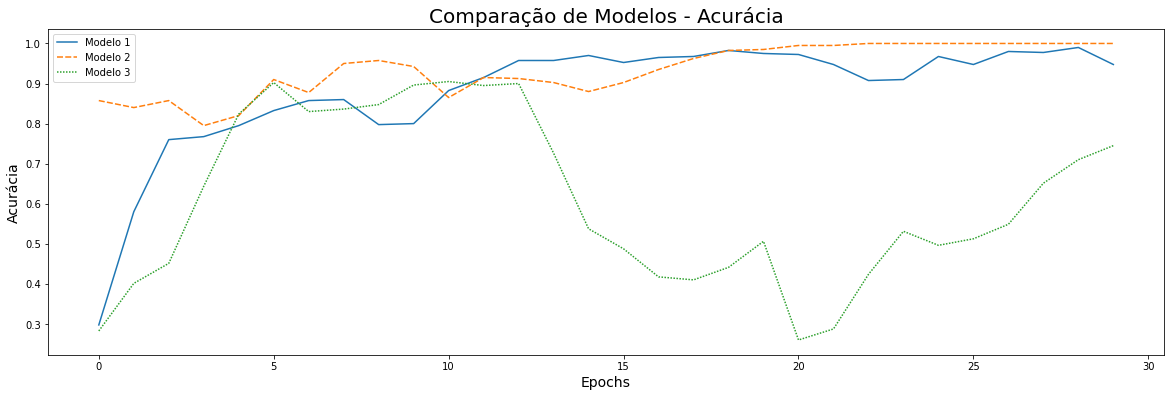

In [ ]:
ax = sns.lineplot(data=analise)
ax.figure.set_size_inches(20,6)
ax.set_title('Comparação de Modelos - Acurácia', fontsize=20)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Acurácia',fontsize=14)

